<a href="https://colab.research.google.com/github/MarcoC87/DataAnalytics/blob/main/PredictingModeling/Regression/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate data

x_min = 0
x_max = 100
sample_size = 100

#x = np.linspace(x_min, x_max, sample_size) + np.random.randn(sample_size)
x = np.random.uniform(x_min, x_max, size=sample_size)
y = 2*x + 5 + 20*np.random.randn(sample_size) # np.random.randn return a sample (or samples) from the “standard normal” distribution

plt.scatter(x,y)

**How to find the line of best fit?**

consider the line equation:

$\hat{y}_i = w_1 x_i + w_0$

where $\hat{y}_i$ is the predicted value for a given $x_i$




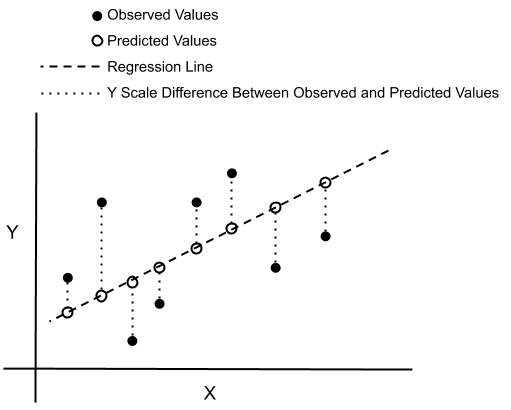


we want to find the parameters $w_0$ and $w_1$ that minimize the cost function (mean squared error)

$E = \frac{1}{N}\sum_i(y_i - \hat{y}_i)^2$


#### 1. **Calculating analytical solution**

We can find the exact solution by solving

$\frac{\partial E}{\partial w_0} = 0$

$\frac{\partial E}{\partial w_1} = 0$

...obtaining

$w_0 = \frac{\overline{y}\sum_i x_i^2 - \overline{x}\sum_i x_i y_i}{\sum_i x_i^2 - \overline{x} \sum_i x_i}$

$w_1 = \frac{\sum_i x_i y_i - \overline{y}\sum x_i}{\sum_i x_i^2 - \overline{x}\sum_i x_i}$






In [ ]:
# Calculate the solution with numpy

w0 = (y.mean()*(x**2).sum() - x.mean()*(x*y).sum())/((x**2).sum() - x.mean()*x.sum())
w1 = ((x*y).sum() - y.mean()*x.sum())/((x**2).sum() - x.mean()*x.sum())

y_pred = w1*x + w0

plt.scatter(x, y)
plt.plot(x, y_pred, color='red', label=f'{np.round(w1,2)}x + {np.round(w0,2)}')
plt.legend()
plt.show()

#### 2. **Using Scikit-Learn**

In [ ]:
from sklearn.linear_model import LinearRegression

X = x.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X, y)

w0 = round(reg.intercept_, 2)
w1 = round(reg.coef_[0],2)
y_pred = reg.predict(X)

plt.scatter(x, y)
plt.plot(X, y_pred, color='red', label=f'{w1}x+{w0}')
plt.legend()
plt.show()

#### 3. **Using Gradient Descent optimization algorithm**

Gradient Descent (GD) is an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function.

Gradient Descent Algorithm iteratively calculates the next point using gradient at the current position, then scales it (by a learning rate $\eta$) and subtracts obtained value from the current position.

$p_{n+1} = p_{n} - \eta\nabla(p_{n})$ 

In summary, Gradient Descent method’s steps are:
 

1.   choose a starting point (initialisation)
2.   calculate gradient at this point
3.   make a scaled step in the opposite direction to the gradient (objective: minimise)
4.   repeat points 2 and 3 until one of the criteria is met:
     - maximum number of iterations reached
     - step size is smaller than the tolerance.

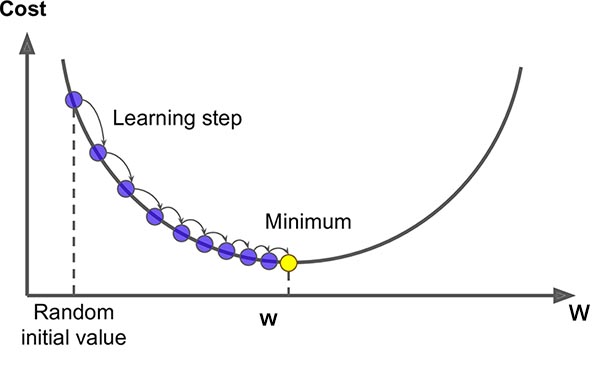


We want to minimize the cost function

$E = \sum_i(y_i - \hat{y}_i)^2 = \sum_i(y_i - w_1 x_i - w_0)^2$

by using the gradient descent algorithm

1. Take the cost function and take a partial derivative with respect to $w_0$ and $w_1$

$\frac{\partial E}{\partial w_0} = 2 \sum_i(y_i -w_1 x_i -w_0)(-1)$

$\frac{\partial E}{\partial w_1} = 2 \sum_i(y_i -w_1 x_i -w_0)(-x_i)$



2. Plug them back into our gradient descent algorithm

$w_0 = w_0 -\eta(2 \sum_i(y_i -w_1 x_i -w_0)(-1))$

$w_1 = w_1 - \eta(2 \sum_i(y_i -w_1 x_i -w_0)(-x_i))$


3. Repeat the previous steps until convergence


In [ ]:
import numpy as np

def cost_function (X, y, w0, w1):
    N = len(X)
    return (1/N)*((y - w1*X - w0)**2).sum()

def gradient_descent(X, y, w0 ,w1, learning_rate):
    
    N = len(X)
    
    w0_deriv = (1/N)*2*((w1 * X + w0) - y).sum()
    w1_deriv = (1/N)*2*(((w1 * X + w0) - y)*X).sum()
    
    w0 -= learning_rate * w0_deriv
    w1 -= learning_rate * w1_deriv
    
    return w0, w1

def training (X, y, w0, w1, learning_rate, iters):
    cost_history = []
    w0_history = []
    w1_history = []
    
    for i in range(iters):
        w0, w1 = gradient_descent(X, y, w0, w1, learning_rate)
        w0_history.append(w0)
        w1_history.append(w1)
        cost_history.append(cost_function(X, y, w0, w1))
    return w0_history, w1_history, cost_history

In [ ]:
# start with some random value
w0 = np.random.random()
w1 = np.random.random()

w0_history, w1_history, cost_history = training (x, y, w0, w1, learning_rate=0.0001, iters=10)


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

ax1.plot(cost_history, '-o', label='cost function')
ax1.legend()

ax2.plot(w0_history,  '-o', label='$w_0$')
ax2.legend()

ax3.plot(w1_history,  '-o', label='$w_1$')
ax3.legend()

plt.xlabel('iterations')

plt.show()

In [ ]:
w0 = np.round(w0_history[-1],2)
w1 = np.round(w1_history[-1],2)
y_pred = w1*x + w0

plt.scatter(x,y)
plt.plot(x, y_pred, color='red', label=f'{w1}x+{w0}')
plt.legend()
plt.show()

**Gradient Descent variants**

There are three types of gradient descent methods based on the amount of data used to calculate the gradient:


1.   Batch gradient descent
2.   Stochastic gradient descent (SGD)
3.   Mini-batch gradient descent

In batch gradient descent, to calculate the gradient of the cost function, we calculate the error for each example in the training dataset and then take the sum. The model is updated only after all examples have been evaluated.

In SGD, we use one training sample at each iteration instead of using the whole dataset to sum all for every step, that is — SGD performs a parameter update for each observation. So instead of looping over each observation, it just needs one to perform the parameter update.

Mini-batch gradient descent is a combination of both bath gradient descent and stochastic gradient descent. Mini-batch gradient descent uses n data points (instead of one sample in SGD) at each iteration.

[https://towardsdatascience.com/minimizing-the-cost-function-gradient-descent-a5dd6b5350e1](https://towardsdatascience.com/minimizing-the-cost-function-gradient-descent-a5dd6b5350e1)